# Introduction
Here, we are reading in a dataset of traffic violations downloaded from https://data.ny.gov/Transportation/Traffic-Tickets-Issued-Four-Year-Window/q4hy-kbtf. The intention is to extract useful patterns in traffic violations that will be helpful for the police department in order to better manage traffic violations. Also, this analysis could potentially be useful for the everyday commuter. 
For this project, I used a public dataset released by the New York State DMV for traffic violations in a four-year window between 2013 and 2016. Data extracted from records of tickets on file with NYS DMV. The tickets were issued to motorists for violations of

We start off by loading the dataset as a csv file. This raw dataset contains 1.5 GB of data with about 3 million rows. Let's read in this data into a dataframe and view the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.cm import plasma
pd.options.mode.chained_assignment = None

df = pd.read_csv('Traffic_Tickets_Issued__Four_Year_Window.csv', index_col=False, header=0)
df2 = df.dropna()  # we ignore rows with incomplete data
print(df2.head(5))



  Violation Charged Code               Violation Description  Violation Year  \
0                  5091G                UNLICENSED GT 60DAYS            2015   
1                    376                LIGHTING-VARIOUS VIO            2015   
2                  1160C  IMPROPER LEFT TURN ON ONE-WAY RDWY            2015   
3                  5091G                UNLICENSED GT 60DAYS            2015   
4                  5091G                UNLICENSED GT 60DAYS            2015   

   Violation Month Violation Day of Week  Age at Violation Gender  \
0                1              THURSDAY              55.0      M   
1                1              THURSDAY              24.0      M   
2                2                MONDAY              62.0      M   
3                9              THURSDAY              33.0      F   
4                5              SATURDAY              45.0      M   

  State of License                  Police Agency                Court Source  
0         NEW YORK      

Let's jump into the analysis. For starters, let's look at which months have the highest number of violations. At this point, it would be expected that the summer months have higher number of violations simply because theere are more drivers on the road. But we shall see. 

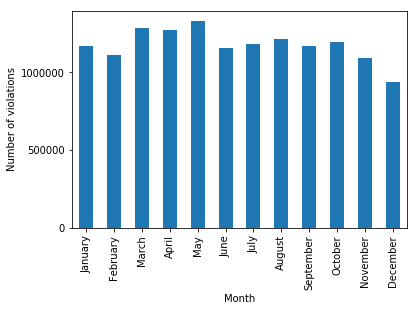

In [2]:
violmonth = df2['Violation Month'].value_counts().sort_index()
fig, ax = plt.subplots()
violmonth.plot(ax=ax,kind='bar')
x1 = [0,1,2,3,4,5,6,7,8,9,10,11]
squad = ['January','February','March','April','May','June','July','August','September','October','November','December']

matplotlib.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (10,10)

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of violations')
plt.show();


While we are seeing that the highest number of violations are committed in the months of March-May, it is rather surprising that the months of June-September (which would involve large amounts of travel) having a dip in the number of violations. 

Next, let's look at the distribution of traffic violations on different days of the week. 

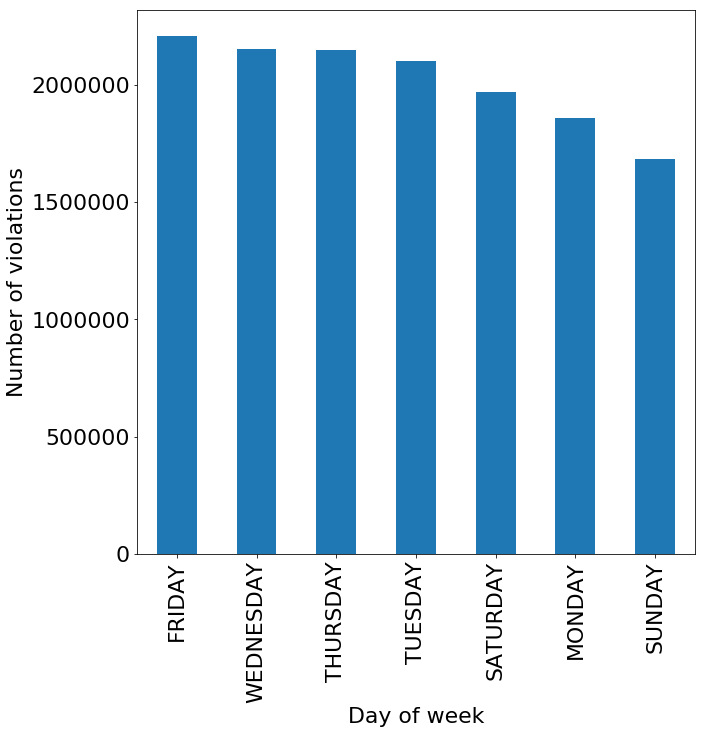

In [3]:
violday = df2['Violation Day of Week'].value_counts()
fig, ax = plt.subplots()

violday.plot(ax=ax,kind='bar')
plt.xlabel('Day of week')
plt.ylabel('Number of violations')
plt.show();


 I am suspecting that a large percentage of violations that happen on Fridays are drunk driving violations. 



# How does Age play a role?

Let's also look at the ages of violation. We can expect younger people to commit more traffic violations due to lack of experience. 

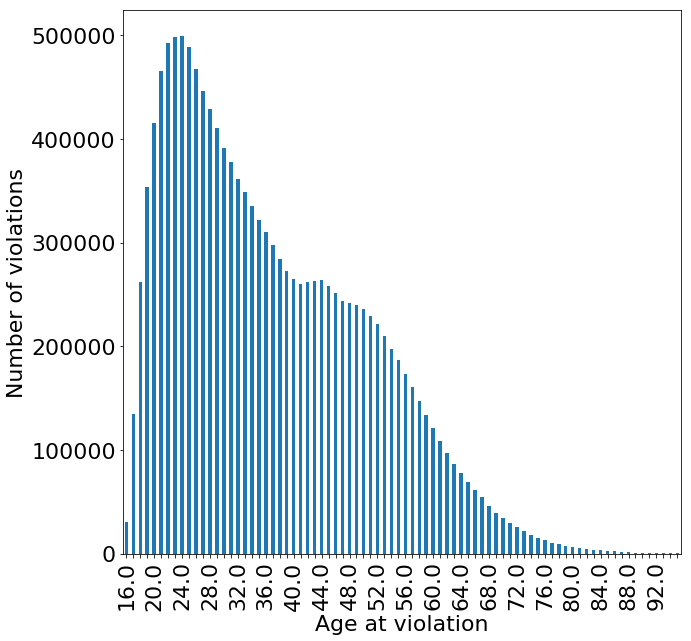

In [4]:
violage = df2['Age at Violation'].value_counts().sort_index()
fig, ax = plt.subplots()
violage.plot(ax=ax,kind='bar')
plt.rcParams["figure.figsize"] = (14,10)
ticklabels = ['']*len(violage.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item for item in violage.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.xlabel('Age at violation')
plt.ylabel('Number of violations')
plt.show();


It is interesting to note that there is almost a bimodal distribution of violations, with one peak around the 21 year old mark and another at the 44 year mark. 

We can also bin the data into different age groups to help further analysis. 

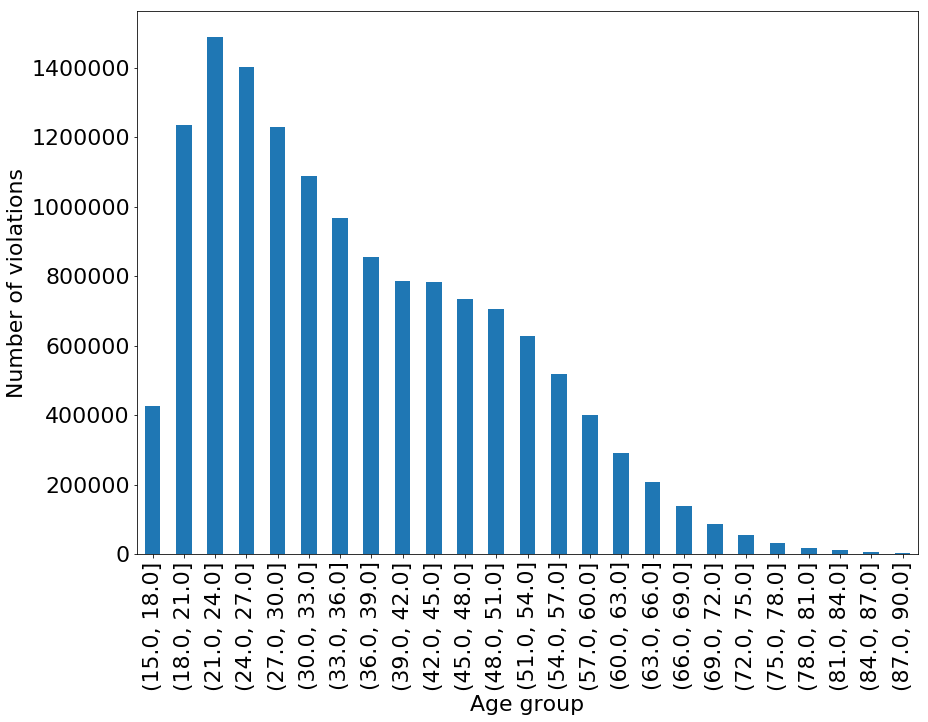

In [5]:
agebins = np.linspace(15,90,26)
df2['agebinned'] = pd.cut(df2['Age at Violation'], agebins)
violagebins = df2['agebinned'].value_counts().sort_index()


fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,10)
violagebins.plot(ax=ax,kind='bar')
plt.xlabel('Age group')
plt.ylabel('Number of violations')
plt.show();

# Violations by court

Next, let's take a closer look at the violation distribution by court. 

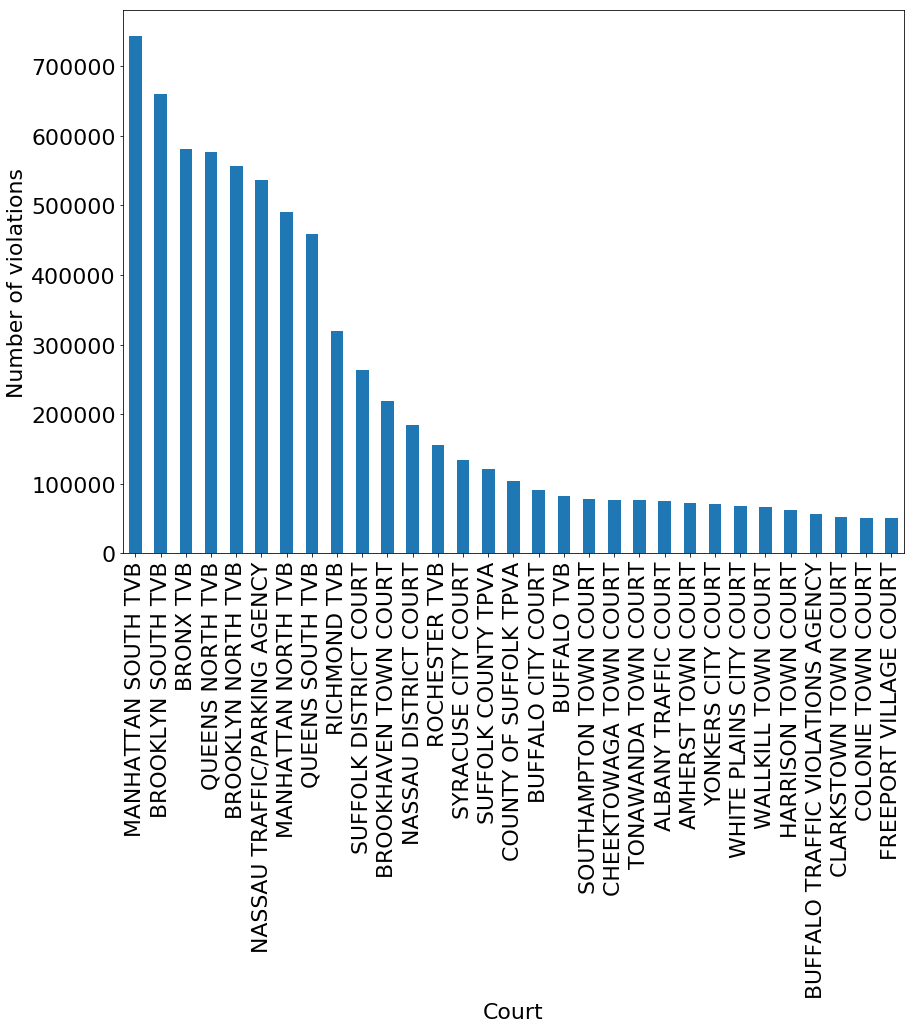

In [6]:
df2['SpeedFlag'] = np.where(df2['Violation Description'].str.contains("speed", case=False, na=False), 1, 0)
df2['SpeedFlag'] = df2['SpeedFlag'].astype(bool)
speedingviol = df2[df2['SpeedFlag']==1]

courtviol=df2['Court'].value_counts()
courtvioltop=courtviol.loc[courtviol>50000]

fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,10)
plt.xlabel('Court')
plt.ylabel('Number of violations')
courtvioltop.plot(ax=ax,kind='bar')
plt.show()
fig.savefig('violationsbycourt.png')

from IPython.display import Image
Image(filename='violationsbycourt.png')

# Conclusion

From plots 1 and 2, we can gather information about where the traffic violations occur and what demographic of people are more likely to coommit them. Of course, with more time spent, plenty of insights can be obtained from this data. For example, the regions of speeding from Plot1 can be used to better inform where to monitor for speeding vehicles. And using the distribution of violations by day of the week and month, the police can have a better idea about the likelihood of drivers committing violations. 